
# **NATURAL LANGUAGE PROCESSING  AND CLUSTERING DATASET**

---
**removed special charachters with blank spaces in data
**Tokenize data
**Stemming
**Converted to lowercase
**vectorized
**clustering using kmeans
**Using elbow method to get value of k






In [ ]:
import pandas as pd
df=pd.read_csv("/content/abcnews-date-text.csv",usecols=["headline_text"],nrows=5000)
df

,headline_text
0,aba decides against community broadcasting lic...
1,act fire witnesses must be aware of defamation
2,a g calls for infrastructure protection summit
3,air nz staff in aust strike for pay rise
4,air nz strike to affect australian travellers
...,...
4995,singapore warns travellers after virus outbreak
4996,slater stars for blues on day one
4997,sopranos filming delayed over contract dispute
4998,souris outlines regional roads funding


In [ ]:
df.isna().sum()

headline_text    0
dtype: int64

In [ ]:
df.dtypes

headline_text    object
dtype: object

In [ ]:
txt=df.headline_text
txt

0       aba decides against community broadcasting lic...
1          act fire witnesses must be aware of defamation
2          a g calls for infrastructure protection summit
3                air nz staff in aust strike for pay rise
4           air nz strike to affect australian travellers
                              ...                        
4995      singapore warns travellers after virus outbreak
4996                    slater stars for blues on day one
4997       sopranos filming delayed over contract dispute
4998               souris outlines regional roads funding
4999               south east water licensees to pay levy
Name: headline_text, Length: 5000, dtype: object

In [ ]:
#remove special charachters with blank spaces
txt=txt.str.replace('[^a-zA-Z0-9]+'," ")
txt


<ipython-input-115-269ecab9222e>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  txt=txt.str.replace('[^a-zA-Z0-9]+'," ")


0       aba decides against community broadcasting lic...
1          act fire witnesses must be aware of defamation
2          a g calls for infrastructure protection summit
3                air nz staff in aust strike for pay rise
4           air nz strike to affect australian travellers
                              ...                        
4995      singapore warns travellers after virus outbreak
4996                    slater stars for blues on day one
4997       sopranos filming delayed over contract dispute
4998               souris outlines regional roads funding
4999               south east water licensees to pay levy
Name: headline_text, Length: 5000, dtype: object

In [ ]:
# stemming - snowball stemmer is used
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer("english")
import nltk #importing natural language toolkit 
from nltk.tokenize import word_tokenize # word tokenizer is used to tokenize a sentence into tokens or words
nltk.download("punkt") # an additional file that support natural language processing


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
txt=txt.apply(lambda x:[stemmer.stem(i.lower()) for i in word_tokenize(x)]).apply(lambda y:' '.join(y))
txt # here the tokenized data is stemmed and also converted to lowecase letters and then joined with the next token/word

0       aba decid against communiti broadcast licenc
1                 act fire wit must be awar of defam
2          a g call for infrastructur protect summit
3           air nz staff in aust strike for pay rise
4          air nz strike to affect australian travel
                            ...                     
4995       singapor warn travel after virus outbreak
4996                 slater star for blue on day one
4997         soprano film delay over contract disput
4998                   souri outlin region road fund
4999            south east water license to pay levi
Name: headline_text, Length: 5000, dtype: object

In [ ]:
from nltk.corpus import stopwords# importing stopwords(joining words that does not affect the content of data)
nltk.download('stopwords')
sw=stopwords.words('english')
print(sw)# list of stop words are stored in variable "sw"

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# tokenized the sentences in "txt" and compare it with the stopwords stored in variable "sw" 
#if exist then the the corresponding token is removed from "txt"
txt=txt.apply(lambda x:[i for i in word_tokenize(x) if i not in sw]).apply(lambda y:" ".join(y))
txt

0         aba decid communiti broadcast licenc
1                 act fire wit must awar defam
2          g call infrastructur protect summit
3            air nz staff aust strike pay rise
4       air nz strike affect australian travel
                         ...                  
4995       singapor warn travel virus outbreak
4996                  slater star blue day one
4997        soprano film delay contract disput
4998             souri outlin region road fund
4999         south east water license pay levi
Name: headline_text, Length: 5000, dtype: object

In [ ]:
#removing other unwanted items from txt
txt=txt.apply(lambda x:[i for i in word_tokenize(x) if len(i)>=3]).apply(lambda y:" ".join(y))
txt

0       aba decid communiti broadcast licenc
1               act fire wit must awar defam
2          call infrastructur protect summit
3             air staff aust strike pay rise
4        air strike affect australian travel
                        ...                 
4995     singapor warn travel virus outbreak
4996                slater star blue day one
4997      soprano film delay contract disput
4998           souri outlin region road fund
4999       south east water license pay levi
Name: headline_text, Length: 5000, dtype: object

In [ ]:
# vectorized
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data_vec=vec.fit_transform(txt)
print(data_vec)

  (0, 2666)	0.47481440472288794
  (0, 681)	0.4882125296508999
  (0, 1063)	0.36150978643260123
  (0, 1306)	0.4088508373048087
  (0, 78)	0.4882125296508999
  (1, 1315)	0.46533055378666427
  (1, 402)	0.46533055378666427
  (1, 3040)	0.40474430134902495
  (1, 5052)	0.4376739672335005
  (1, 1816)	0.29332194313873705
  (1, 117)	0.3542890599921012
  (2, 4444)	0.5093899509434731
  (2, 3564)	0.49501130980903174
  (2, 2351)	0.6021660063357204
  (2, 770)	0.36452953495243995
  (3, 3849)	0.39008378033912866
  (3, 3331)	0.40266655722753747
  (3, 4397)	0.4233330788018658
  (3, 383)	0.3767455862438008
  (3, 4324)	0.4672844866532536
  (3, 178)	0.3823497929619028
  (4, 4694)	0.4744094441020436
  (4, 387)	0.44980902246361265
  (4, 149)	0.47952078537434734
  (4, 4397)	0.43441846716525856
  :	:
  (4995, 4905)	0.4794778398061785
  (4995, 4162)	0.5104503932134172
  (4995, 4947)	0.30422783378998947
  (4995, 4694)	0.4170496042124562
  (4996, 4190)	0.5335219686619243
  (4996, 587)	0.4305643093599747
  (4996, 433

In [ ]:
print(data_vec)

  (0, 2666)	0.47481440472288794
  (0, 681)	0.4882125296508999
  (0, 1063)	0.36150978643260123
  (0, 1306)	0.4088508373048087
  (0, 78)	0.4882125296508999
  (1, 1315)	0.46533055378666427
  (1, 402)	0.46533055378666427
  (1, 3040)	0.40474430134902495
  (1, 5052)	0.4376739672335005
  (1, 1816)	0.29332194313873705
  (1, 117)	0.3542890599921012
  (2, 4444)	0.5093899509434731
  (2, 3564)	0.49501130980903174
  (2, 2351)	0.6021660063357204
  (2, 770)	0.36452953495243995
  (3, 3849)	0.39008378033912866
  (3, 3331)	0.40266655722753747
  (3, 4397)	0.4233330788018658
  (3, 383)	0.3767455862438008
  (3, 4324)	0.4672844866532536
  (3, 178)	0.3823497929619028
  (4, 4694)	0.4744094441020436
  (4, 387)	0.44980902246361265
  (4, 149)	0.47952078537434734
  (4, 4397)	0.43441846716525856
  :	:
  (4995, 4905)	0.4794778398061785
  (4995, 4162)	0.5104503932134172
  (4995, 4947)	0.30422783378998947
  (4995, 4694)	0.4170496042124562
  (4996, 4190)	0.5335219686619243
  (4996, 587)	0.4305643093599747
  (4996, 433

In [ ]:
from sklearn.cluster import KMeans #importing kmeans clustering algorithhm(Unsupervised)
wcss=[]  # with in cluster sum of squares(wcss) an empty list created
for i in range(1,10):
  kmeans=KMeans(n_clusters=i,init="k-means++",random_state=0)
  kmeans.fit(data_vec)
  wcss.append(kmeans.inertia_)
wcss

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[4981.560787519642,
 4969.394430565002,
 4951.781123334757,
 4938.602052726956,
 4929.19033486789,
 4915.054231310137,
 4897.596215480628,
 4895.3541042192055,
 4880.575635187783]

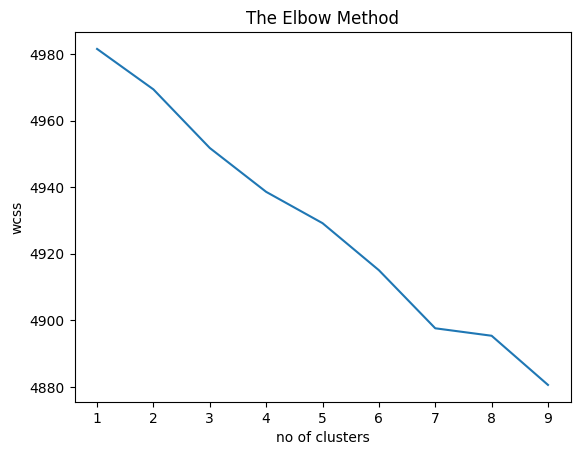

In [ ]:
import matplotlib.pyplot as plt # plotting graph wrt wcss value ,using elbow method value for "k" is taken
plt.plot(range(1,10),wcss)
plt.title("The Elbow Method")
plt.xlabel("no of clusters")
plt.ylabel("wcss")
plt.savefig("nlpcluster.png")
plt.show()  

In [ ]:
km=KMeans(n_clusters=7,init="k-means++",random_state=0) # value of k is taken as "7"
km.fit(data_vec)
y=km.predict(data_vec)# predicting values
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [ ]:
df["cluster"]=y # assigned the sentence to corresponding clusters
df

,headline_text,cluster
0,aba decides against community broadcasting lic...,0
1,act fire witnesses must be aware of defamation,0
2,a g calls for infrastructure protection summit,0
3,air nz staff in aust strike for pay rise,0
4,air nz strike to affect australian travellers,0
...,...,...
4995,singapore warns travellers after virus outbreak,0
4996,slater stars for blues on day one,0
4997,sopranos filming delayed over contract dispute,0
4998,souris outlines regional roads funding,0


In [ ]:
df["cluster"].value_counts() # counts in each cluster

0    4128
4     192
3     168
2     161
5     146
1     112
6      93
Name: cluster, dtype: int64